# Sinhala News Data Analysis (Hiru News)

This notebook presents an exploratory data analysis (EDA) of Sinhala-language
news articles collected from publicly accessible pages of the **Hiru News** website.

**Purpose**
- Understand dataset structure and quality
- Analyze category distribution and trends
- Support a machine learning–based news classification task

**Ethical Notice**
- Data used strictly for educational purposes
- No restricted or paywalled content accessed
- All content remains the copyright and intellectual property of Hiru News


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["figure.figsize"] = (10, 5)

In [21]:
df = pd.read_csv("filtered_hiru_news.csv")
df.head()

,title,description,date,image_url,news_url,category
0,ලක්ෂ පහක අල්ලසක් ගත්තැයි වැලිමඩ අධිකරණයේ රෙජිස...,ඉඩමක භුක්තිය පැමිණිලිකරුවෙකුට ලබාදෙමින් වැලිමඩ...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440283/welimada-court-regi...,Crime
1,මත්ද්‍රව්‍ය සන්තකයේ තබාගෙන සිටියැයි නීතිඥවරයාට...,මාතර මිරිස්ස ප්‍රදේශයේ හොටලයක් තුළ සිටියදී කොක...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440282/lawyer-arrested-for...,Crime
2,රත්මලාන ප්‍රදේශයේ දී වළ දමා තිබූ උණ්ඩ දහසකට වැ...,"රත්මලාන, බොරුපන ප්‍රදේශයේ විද්‍යාලයක භූමියේ වළ...",2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440281/over-a-thousand-bul...,International
3,ගම්මන්පිල මල්වතු අස්ගිරි මහා නාහිමිවරුන් බැහැදකී,"වත්මන් ආණ්ඩුවේ දැක්ම රටට පටහැනි බවත්, නව අධ්‍ය...",2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440278/gammanpila-visits-t...,Politics
4,ඕස්ට්‍රේලියාවේ නව යෞවනයන්ගේ සෝෂල් මීඩියා ගිණුම...,ලොව ප්‍රථම වතාවට හඳුන්වා දුන් නීතියට අවනතන වෙම...,2026-01-12,https://cdn.hirunews.lk/Data/News_Images/20260...,https://hirunews.lk/440272/australia-shuts-dow...,Politics


## Dataset Description

The dataset contains Sinhala-language news articles with the following columns:
- **title**: News headline
- **description**: Short summary of the article
- **date**: Publication date
- **image_url**: Associated image URL
- **news_url**: Original article URL
- **category**: Assigned news category

This structured format enables both exploratory analysis and machine learning.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7848 non-null   object
 1   description  7848 non-null   object
 2   date         7848 non-null   object
 3   image_url    7848 non-null   object
 4   news_url     7848 non-null   object
 5   category     7848 non-null   object
dtypes: object(6)
memory usage: 368.0+ KB


## Data Quality Summary

- Total records: ~7,800+
- Missing values: None detected
- Data types: Textual fields with a date column
- Language: Sinhala

The dataset is clean and requires minimal preprocessing.


In [23]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        7848 non-null   object        
 1   description  7848 non-null   object        
 2   date         7848 non-null   datetime64[ns]
 3   image_url    7848 non-null   object        
 4   news_url     7848 non-null   object        
 5   category     7848 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 368.0+ KB


In [24]:
df.duplicated(subset="news_url").sum()
df.drop_duplicates(subset="news_url", inplace=True)

## Temporal Analysis

Analyzing the number of articles published per day helps identify
event-driven news spikes (e.g., political events, crimes, weather alerts).

In [25]:
news_per_day = df["date"].value_counts().sort_index()
news_per_day.head()

date
2025-09-08    45
2025-09-09    85
2025-09-10    70
2025-09-11    57
2025-09-12    70
Name: count, dtype: int64

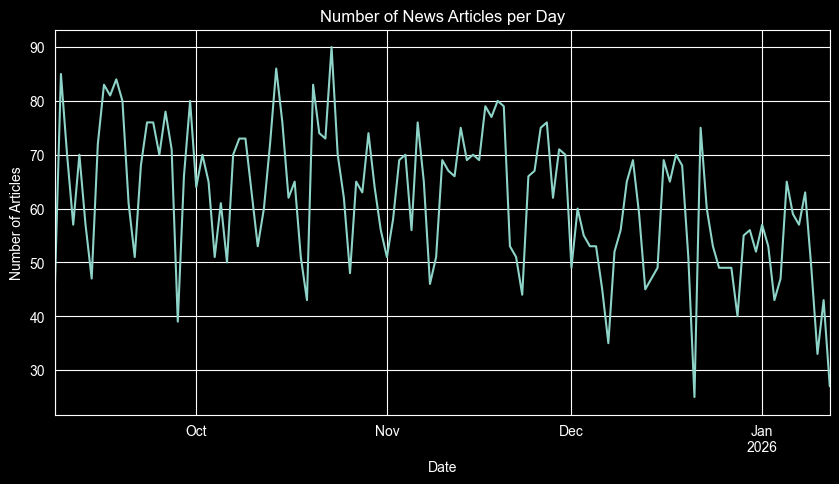

In [26]:
news_per_day.plot(kind="line", title="Number of News Articles per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

## Category Distribution Analysis

Articles are classified into categories such as:
Politics, Crime, International, Sports, Weather, and Other.

This analysis reveals editorial focus and public interest trends.


In [27]:
df["category"].value_counts()

category
Politics         1737
Crime            1459
Other            1085
Business          886
Weather           821
Sports            807
International     632
Health            220
Education         201
Name: count, dtype: int64

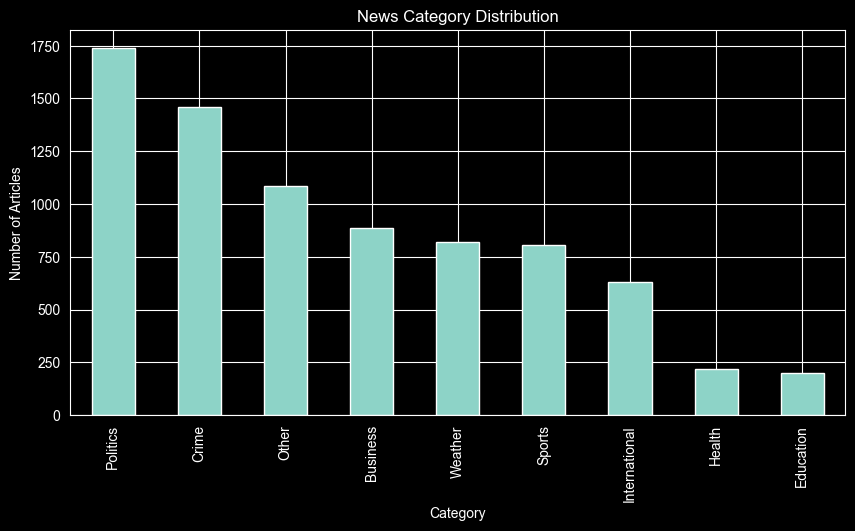

In [28]:
df["category"].value_counts().plot(
    kind="bar",
    title="News Category Distribution"
)
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

### Observations
- **Politics** is the dominant category, reflecting ongoing political activity.
- **Crime** is highly represented, including arrests and court cases.
- **Sports** news is mainly cricket-related.
- **Weather** articles appear during alert periods.
- **International** news covers foreign leaders and global events.

In [29]:
df["title_length"] = df["title"].str.len()
df["description_length"] = df["description"].str.len()

df[["title_length", "description_length"]].describe()

,title_length,description_length
count,7848.000000,7848.000000
mean,52.930428,147.120031
std,18.381636,6.322892
min,8.000000,82.000000
25%,40.000000,146.000000
50%,51.000000,149.000000
75%,63.000000,151.000000
max,163.000000,152.000000


## Text Characteristics

- Titles are short and concise, designed as attention-grabbing headlines.
- Descriptions are longer and provide contextual information.
- The combination of title and description is suitable for text classification.

In [30]:
text = " ".join(df["title"] + " " + df["description"])
words = text.split()

Counter(words).most_common(20)

[('සහ', 2138),
 ('බව', 1886),
 ('ශ්\u200dරී', 1729),
 ('අද', 1319),
 ('ඇති', 1179),
 ('සඳහා', 1178),
 ('කර', 1135),
 ('වන', 1133),
 ('ලංකා', 1016),
 ('-', 930),
 ('වූ', 920),
 ('කළ', 865),
 ('විසින්', 860),
 ('අත්අඩංගුවට', 814),
 ('ලෙස', 794),
 ('හිටපු', 673),
 ('කරන', 657),
 ('ක්\u200dරිකට්', 652),
 ('තිබෙනවා.', 622),
 ('සිට', 575)]

## Image Usage Analysis

Each article includes an image URL, indicating a strong visual-news strategy.

In [31]:
df["has_image"] = df["image_url"].notnull()
df["has_image"].value_counts()

has_image
True    7848
Name: count, dtype: int64

## Suitability for Machine Learning

This dataset is well-suited for machine learning because:
- Text data is clean and consistent
- Categories are clearly defined
- Dataset size is sufficient for training and evaluation
- Titles and descriptions provide strong contextual signals

Traditional ML methods such as **TF-IDF + Logistic Regression**
can effectively classify Sinhala news articles.

In [32]:
df.to_csv("hiru_news_analyzed.csv", index=False, encoding="utf-8-sig")

## Conclusion

This notebook demonstrated an end-to-end exploratory analysis of Sinhala news
data collected from publicly available Hiru News pages.

Key findings include:
- Dominance of political and crime-related news
- Event-driven publication patterns
- High suitability for machine learning classification

All analysis was conducted strictly for educational purposes with full respect
for copyright and ethical data usage.